In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

Distance might be different because of different coordinate systems used

<Axes: >

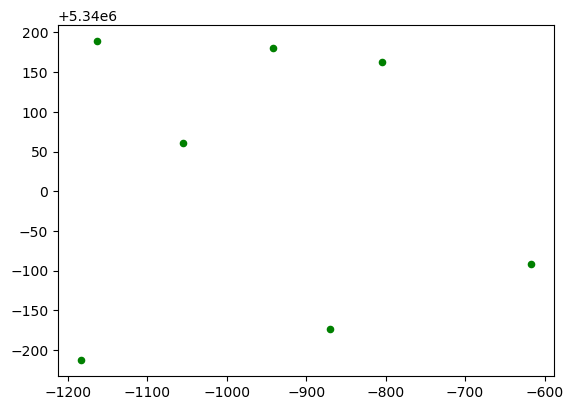

In [23]:
atm = gpd.read_file(r"C:\Users\ehdwn\OneDrive\바탕 화면\python\geopandas\shapefiles\atm.shp")
atm.plot(color='green', markersize=20)

<Axes: >

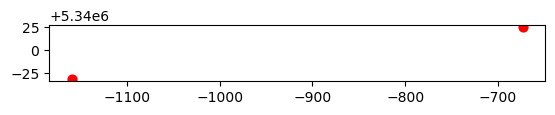

In [24]:
office = gpd.read_file(r"C:\Users\ehdwn\OneDrive\바탕 화면\python\geopandas\shapefiles\office.shp")
office.plot(color='red', markersize=40)

c:\Users\ehdwn\anaconda3\lib\site-packages\geopandas\plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<Axes: >

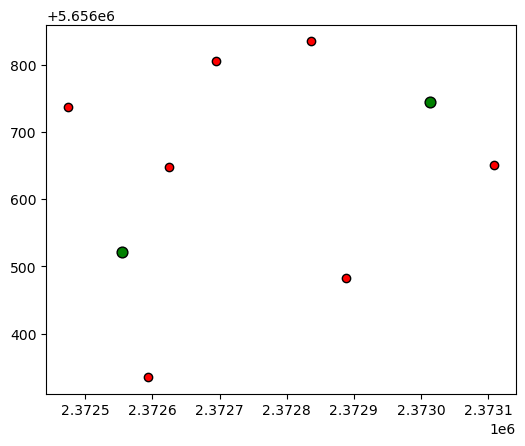

In [49]:
fig, (ax) = plt.subplots()
atm.plot(ax = ax, color='red', edgecolor='black', column='atm')
office.plot(ax = ax, color='green', edgecolor='black', markersize=60)

In [25]:
office

,office,geometry
0,office_1,POINT (-1159.708 5339968.912)
1,office_2,POINT (-673.393 5340024.257)


Calculating distance between the first office and each atms
I need to use only the first office from above, hence i will type [0] at the end of geometry.

In [40]:
atm['distance_to_atm'] = atm.distance(office.geometry[0])
atm = atm[['atm', 'geometry', 'distance_to_atm']]
atm

,atm,geometry,distance_to_atm
0,atm_1,POINT (-805.288 5340162.255),403.726143
1,atm_2,POINT (-942.377 5340180.335),303.204331
2,atm_3,POINT (-1054.924 5340060.440),139.130123
3,atm_4,POINT (-870.023 5339826.998),322.578555
4,atm_5,POINT (-616.504 5339908.192),546.587121
5,atm_6,POINT (-1184.329 5339787.095),183.476213
6,atm_7,POINT (-1163.532 5340189.414),220.535225


Using both locations of office this time

In [39]:
#creating a new geodataframe
distances = gpd.GeoDataFrame()
#creating each columns
distances['atm'] = atm['atm']
distances['distance_to_office_1'] = atm.distance(office.geometry[0])
#Since i am using both offices, i don't need to mention the first_office which i created to extract from office gdf
distances['distance_to_office_2'] = atm.distance(office.geometry[1])
distances

,atm,distance_to_office_1,distance_to_office_2
0,atm_1,403.726143,190.892217
1,atm_2,303.204331,310.986657
2,atm_3,139.130123,383.242623
3,atm_4,322.578555,278.521905
4,atm_5,546.587121,129.257147
5,atm_6,183.476213,563.295180
6,atm_7,220.535225,517.216396


In [41]:
distances.to_csv('atm_distance_to_office.csv', index=False)